In [109]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.io import loadmat
from scipy.misc import imread, imresize

datafile = loadmat('machine-learning-ex3/ex3/ex3data1.mat', struct_as_record=False)

X = datafile['X']
y = datafile['y']

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


Note with this dataset that the digit '0' is given in y as '10', since it is intended for octave, which is a programming language with no zero indexing.

---
### Visualisation of samples in the dataset

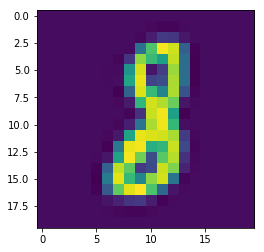

The label corresponding to this image is: [8]


In [110]:
# view a random image in the data using plt.imshow
img_num = random.randint(1, X.shape[0])
# reshape and transpose for img display - transpose req'd, otherwise 90 deg
plt.imshow(X[img_num].reshape((20, 20)).T)
plt.show()
print("The label corresponding to this image is: {}".format(Y[img_num]))
#print("The label corresponding to this image is: {}".format(Y[img_num].argmax(0)))

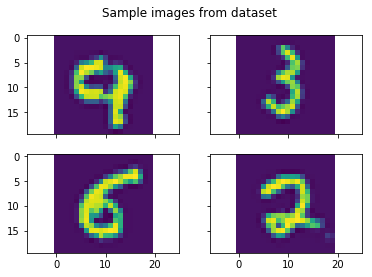

The labels corresponding to these images (reading from top left to right) are:

 [[9]
 [3]
 [6]
 [2]]


In [111]:
imgs = np.random.randint(0, X.shape[0], 4)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Sample images from dataset')
ax1.imshow(X[imgs[0]].reshape((20, 20)).T)
ax2.imshow(X[imgs][1].reshape((20, 20)).T)
ax3.imshow(X[imgs[2]].reshape((20, 20)).T)
ax4.imshow(X[imgs[3]].reshape((20, 20)).T)
plt.show()

print("The labels corresponding to these images (reading from top left to right) are:\n\n {}".format(Y[imgs]))

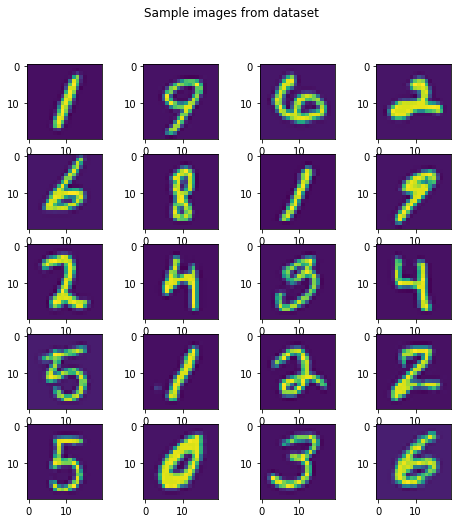

In [128]:
fig=plt.figure(figsize=(8, 8))
fig.suptitle("Sample images from dataset", )
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_num = random.randint(1, X.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[img_num].reshape((20, 20)).T)
plt.show()

---
### Implementing a feedforward neural network

We will implement a simple 3 layer neural network, with an input layer of 401 features (20 x 20 img + 1 bias term), 1 hidden layer of 25 neurons, and an output layer with 10 units for classification of digits from 0 to 9.

In [112]:
# load pre-trained model weights
weight_file = loadmat('machine-learning-ex3/ex3/ex3weights.mat', struct_as_record=False)

Theta1, Theta2 = weight_file['Theta1'], weight_file['Theta2']

In [113]:
# weights should be size 25 by 401 (extra 1 for bias term)
Theta1.shape

(25, 401)

In [114]:
Theta2.shape

(10, 26)

In [115]:
# add a column of 1's to the training data for the bias unit
bias = np.ones((X.shape[0], 1))
a_1 = np.column_stack((bias, X))
a_1.shape

(5000, 401)

In [116]:
z_2 = np.dot(Theta1, a_1.T)
a_2 = (1.0 / (1 + np.exp(-z_2)))
a_2.shape

(25, 5000)

In [117]:
bias = np.ones(a_2.shape[1])
a_2 = np.row_stack((bias, a_2))
a_2.shape

(26, 5000)

In [118]:
z_3 = np.dot(Theta2, a_2)
a_3 = (1.0 / (1 + np.exp(-z_3)))
a_3 = a_3.T
a_3.shape

(5000, 10)

In [119]:
print(np.argmax(a_3[3500]))
print(y[3500])

6
[7]


In [120]:
class Simple_Neural_Network(object):
    """ A simple neural network class that makes predictions. 
        Sigmoid is used as the activation function for this model.
        Returns an array of size 10, with the class of digit from 0 - 9
        indicated with a 1 in the corresponding index of that array.
    """

    def __init__(self, Theta1, Theta2):
        self.Theta1 = Theta1
        self.Theta2 = Theta2

    def predict(self, X):
        # add a column of 1's to the training data for the bias unit
        bias = np.ones((X.shape[0], 1))
        a_1 = np.column_stack((bias, X))
        z_2 = np.dot(self.Theta1, a_1.T)
        a_2 = (1.0 / (1 + np.exp(-z_2)))
        
        # add a bias row to the second layer data
        bias = np.ones(a_2.shape[1])
        a_2 = np.row_stack((bias, a_2))
        
        z_3 = np.dot(self.Theta2, a_2)
        a_3 = (1.0 / (1 + np.exp(-z_3)))
        a_3 = a_3.T
        
        # return the output labels in an array of shape (predict_no, 10)
        return a_3
    
    def output_label(self, output_array):
        # add one to output label (since dataset was designed for octave - non-zero indexing)
        output_label = np.argmax(predictions) + 1
        return output_label

In [121]:
tester_img = X[1].reshape((1, 400))
plot_img = tester_img.reshape((20, 20))
tester_img.shape

(1, 400)

The output prediction for the input image was: 10



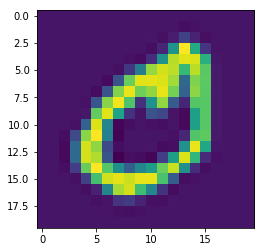

In [122]:
neural_n = Simple_Neural_Network(Theta1, Theta2)
predictions = neural_n.predict(tester_img)
output_prediction = neural_n.output_label(predictions)
print("The output prediction for the input image was: {}\n".format(output_prediction))

# display the img used for prediction
plt.imshow(X[1].reshape((20, 20)).T)
plt.show()

The prediction above worked - 10 corresponds to a digit of 0 in the dataset since octave (the language the dataset is intended for) has no zero indexing and 10 was used instead. This obviously isn't a very good prediction either, since it is data that has been used to train our model in the first place.